# Homework 05 — IANNwTF
## Group 27
Deadline: Nov 28, 2021 23:59

<https://forms.gle/8qwiuUXCfLjKGeg67>

# Dataset

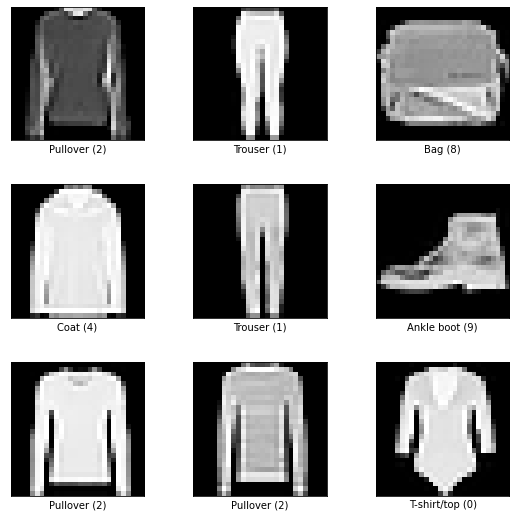

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='C:\\Users\\zoran\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

(train_ds, test_ds), info = tfds.load('fashion_mnist', split=['train', 'test'], shuffle_files=True, with_info=True, as_supervised=True)
fig = tfds.show_examples(train_ds, info)
print(info)

In [2]:
for elem in train_ds.take(1):
    print("Image dimensions: ", elem[0].shape)
    print("Target: ", elem[1])

Image dimensions:  (28, 28, 1)
Target:  tf.Tensor(2, shape=(), dtype=int64)


In [3]:
def prepare_fashion_mnist_data(ds):
    # convert data from uint8 to float32
    ds = ds.map(lambda img, target: (tf.cast(img, tf.float32), target))
    # input normalization: bringing image values from range [0, 255] to [-1, 1]
    ds = ds.map(lambda img, target: ((img/128.)-1., target))
    # create one-hot targets
    ds = ds.map(lambda img, target: (img, tf.one_hot(target, depth=10)))
    # cache this progress in memory
    ds = ds.cache()
    # shuffle, batch, prefetch
    ds = ds.shuffle(1000).batch(8).prefetch(20)
    # return preprocessed dataset
    return ds


In [4]:
train_ds = train_ds.apply(prepare_fashion_mnist_data)
test_ds = test_ds.apply(prepare_fashion_mnist_data)

In [5]:
for elem in train_ds.take(1):
    print("Image dimensions: ", elem[0].shape)
    print("Target: ", elem[1])

Image dimensions:  (8, 28, 28, 1)
Target:  tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]], shape=(8, 10), dtype=float32)


# Model

3. For example, use one or two convolutional layers followed by a max pooling operation
4. You should be able to solve the task with 5 layers only. Also, you should witness an increase in accuracy already after the first training epoch. On Colab with GPU support, an epoch doesn’t need to take more than a minute.
5. A kernel size of 3, no stride and ’same’ padding usually is a good starting point. For filter sizes, we didn’t use more than 64 filters per layer, but feel free to experiment (be aware of lengthy training times though)
6. Apply Global Average Pooling followed by a Dense layer with the number of units depending on your number of classes. Use a softmax activation.
7. For this task you again have to use tf.keras.losses.CategoricalCrossentropy()
8. Again, with the right architecture this should be doable in 10 epochs and shouldn’t take too long on Colab. If using Colab make sure to have your runtime settings set to GPU